# Management and Analysis of Physics Dataset - mod.B

## Final project: Streaming processing of cosmic rays using Drift Tubes detectors

The goal of this project is to reproduce a real-time processing of real data collected in a particle physics detector and publish the results in a dashboard for live monitoring.

### Students:
* Conforto Filippo (2021856)
* Domenichetti Lorenzo (missing)
* Faorlin Tommaso (2021857)

## Consumer notebook

In [1]:
import os
import time
import ssl
import json

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from kafka import KafkaProducer
from kafka import KafkaConsumer

from IPython import display
import pylab as pl

#in order to remove the certificate validation when the file are downloaded
ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
from kafka.admin import KafkaAdminClient, NewTopic
KAFKA_BOOTSTRAP_SERVERS='10.67.22.100:9092'
kafka_admin = KafkaAdminClient(
        bootstrap_servers=KAFKA_BOOTSTRAP_SERVERS,
    )

In [3]:
consumer = KafkaConsumer(bootstrap_servers=KAFKA_BOOTSTRAP_SERVERS,
                         consumer_timeout_ms=100000)

In [4]:
consumer.subscribe('topic_results')

In [5]:
consumer.poll(timeout_ms=0,         #<<--- do not enable dead-times before one poll to the next
              max_records=None,     #<<--- do not limit the number of records to consume at once 
              update_offsets=True   #<<--- update the reading offsets on this topic
             )

{}

In [16]:
def rt_plot(js, fig,axes):
    plt.suptitle(f'Channel distribution, {js["hits"]} total hits')
    for i, ax in enumerate(axes[0]):
        ax.clear()
        ax.set_title(f'Chamber {i}, {js["hits_per_chamber"][i]} hits')
        bin_centers = js["hist_1"][str(i)]["bins"][:-1] + np.diff(js["hist_1"][str(i)]["bins"])/2
        ax.hist(bin_centers, weights=js["hist_1"][str(i)]["counts"], bins=js["hist_1"][str(i)]["bins"], alpha=0.6)
    for i, ax in enumerate(axes[1]):
        ax.clear()
        ax.set_title(f'Chamber {i}, {js["hits_per_chamber"][i]} hits')
        bin_centers = js["hist_2"][str(i)]["bins"][:-1] + np.diff(js["hist_2"][str(i)]["bins"])/2
        ax.hist(bin_centers, weights=js["hist_2"][str(i)]["counts"], bins=js["hist_2"][str(i)]["bins"], alpha=0.6)
    display.clear_output(wait=True)
    display.display(pl.gcf())

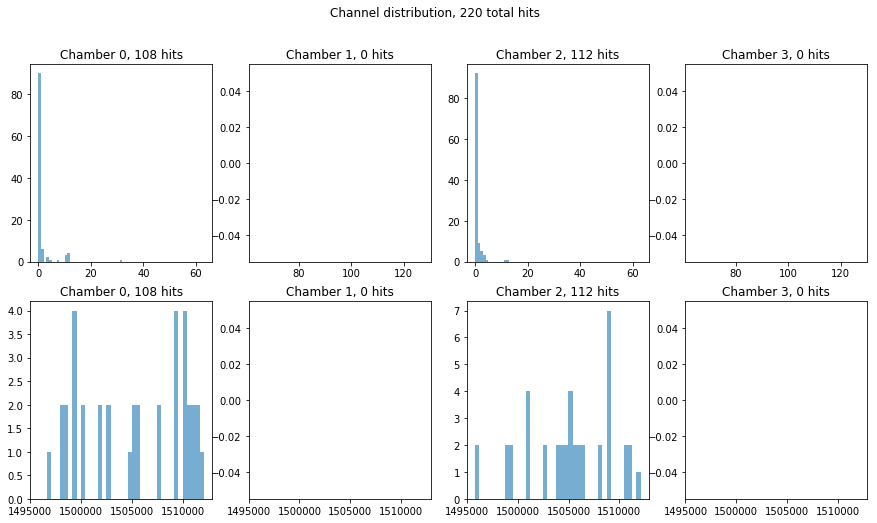

KeyboardInterrupt: 

In [ ]:
fig, axes = plt.subplots(2,4, figsize = (15,8))
for message in consumer:
    rt_plot(json.loads(message.value),fig,axes)